In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest_cv_6.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in haxby_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100, embedding_dim=2)

10/04/2020 13:10:08 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/04/2020 13:10:08 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/04/2020 13:10:09 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/04/2020 13:10:10 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run04_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/04/2020 13:10:11 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run05_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Fina

In [7]:
dtfa.num_voxels

32233

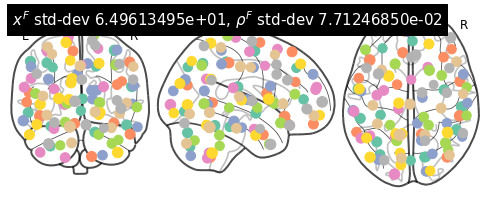

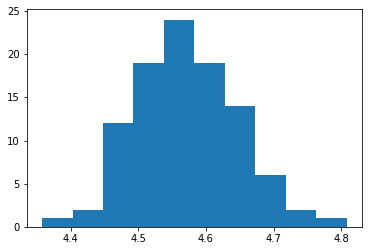

(<nilearn.plotting.displays.OrthoProjector at 0x7f6b023b5ad0>,
 tensor([[-3.0984e+01, -3.1874e+01, -2.1689e+01],
         [ 3.5964e+01, -5.6021e+00,  5.8152e+01],
         [ 4.8861e+01, -4.7497e+01, -2.0500e+01],
         [-3.4956e+01, -6.0203e+01,  4.4880e+01],
         [-2.8879e+01,  3.8224e+01,  4.0159e+01],
         [ 2.6332e+00,  4.5855e+01,  7.0789e+00],
         [ 7.5484e-01, -7.9757e+01, -5.4853e+00],
         [ 1.6738e+01, -7.5916e+01,  4.1136e+01],
         [-5.2307e+01, -3.5446e+01,  4.6517e+01],
         [ 5.4377e+01, -2.3429e+01,  2.0102e+01],
         [-5.4690e+01, -4.3530e+00, -7.4402e+00],
         [ 1.5491e+01, -7.6227e+01, -2.7982e+01],
         [-3.1400e+01, -7.3512e+01, -4.2804e+01],
         [ 3.5338e+01,  2.8880e+01, -1.8220e+01],
         [-1.3580e+01,  6.6670e-02,  6.6965e+01],
         [-7.5667e+00,  3.3716e+01,  5.7135e+01],
         [ 3.8851e+01, -7.6434e+01,  2.2025e+01],
         [ 4.3793e+01,  3.7246e+01,  2.5460e+01],
         [ 1.2015e+01, -5.2233e+01, -

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

464

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=True))

10/04/2020 13:11:13 [Epoch 1] (6139ms) Posterior free-energy 8.15938355e+09 = KL from prior 1.50428100e+07 - log-likelihood -8.14434048e+09
10/04/2020 13:11:13 Saving checkpoint...
10/04/2020 13:11:19 [Epoch 2] (6054ms) Posterior free-energy 7.94137293e+09 = KL from prior 9.88111500e+06 - log-likelihood -7.93149286e+09
10/04/2020 13:11:25 [Epoch 3] (5956ms) Posterior free-energy 7.80053504e+09 = KL from prior 7.30805750e+06 - log-likelihood -7.79322726e+09
10/04/2020 13:11:31 [Epoch 4] (5902ms) Posterior free-energy 7.69443123e+09 = KL from prior 5.17881350e+06 - log-likelihood -7.68925235e+09
10/04/2020 13:11:37 [Epoch 5] (5918ms) Posterior free-energy 7.62520320e+09 = KL from prior 3.83916325e+06 - log-likelihood -7.62136371e+09
10/04/2020 13:11:43 [Epoch 6] (5991ms) Posterior free-energy 7.56710912e+09 = KL from prior 2.81988125e+06 - log-likelihood -7.56428902e+09
10/04/2020 13:11:49 [Epoch 7] (5917ms) Posterior free-energy 7.52398387e+09 = KL from prior 2.02833425e+06 - log-likeli

Epoch   475: reducing learning rate of group 0 to 5.0000e-03.
Epoch   475: reducing learning rate of group 1 to 5.0000e-04.
Epoch   475: reducing learning rate of group 2 to 5.0000e-03.
Epoch   475: reducing learning rate of group 3 to 5.0000e-04.


10/04/2020 13:58:24 [Epoch 476] (5942ms) Posterior free-energy 5.22578534e+09 = KL from prior 1.69150462e+06 - log-likelihood -5.22409370e+09
10/04/2020 13:58:30 [Epoch 477] (5901ms) Posterior free-energy 5.19586509e+09 = KL from prior 1.68934200e+06 - log-likelihood -5.19417600e+09
10/04/2020 13:58:36 [Epoch 478] (5859ms) Posterior free-energy 5.19443098e+09 = KL from prior 1.68774662e+06 - log-likelihood -5.19274291e+09
10/04/2020 13:58:42 [Epoch 479] (5891ms) Posterior free-energy 5.19395328e+09 = KL from prior 1.68895475e+06 - log-likelihood -5.19226419e+09
10/04/2020 13:58:48 [Epoch 480] (5876ms) Posterior free-energy 5.19348685e+09 = KL from prior 1.69552750e+06 - log-likelihood -5.19179162e+09
10/04/2020 13:58:54 [Epoch 481] (5843ms) Posterior free-energy 5.19322829e+09 = KL from prior 1.69768812e+06 - log-likelihood -5.19153050e+09
10/04/2020 13:58:59 [Epoch 482] (5892ms) Posterior free-energy 5.19286323e+09 = KL from prior 1.70454888e+06 - log-likelihood -5.19115878e+09
10/04/

Epoch   696: reducing learning rate of group 0 to 2.5000e-03.
Epoch   696: reducing learning rate of group 1 to 2.5000e-04.
Epoch   696: reducing learning rate of group 2 to 2.5000e-03.
Epoch   696: reducing learning rate of group 3 to 2.5000e-04.


10/04/2020 14:20:14 [Epoch 697] (5931ms) Posterior free-energy 5.17367040e+09 = KL from prior 1.74015362e+06 - log-likelihood -5.17193062e+09
10/04/2020 14:20:20 [Epoch 698] (5912ms) Posterior free-energy 5.17217075e+09 = KL from prior 1.73055062e+06 - log-likelihood -5.17043866e+09
10/04/2020 14:20:26 [Epoch 699] (5884ms) Posterior free-energy 5.17188762e+09 = KL from prior 1.73296150e+06 - log-likelihood -5.17015450e+09
10/04/2020 14:20:32 [Epoch 700] (5913ms) Posterior free-energy 5.17164339e+09 = KL from prior 1.73073550e+06 - log-likelihood -5.16991181e+09
10/04/2020 14:20:38 [Epoch 701] (5904ms) Posterior free-energy 5.17157990e+09 = KL from prior 1.73213275e+06 - log-likelihood -5.16984832e+09
10/04/2020 14:20:38 Saving checkpoint...
10/04/2020 14:20:44 [Epoch 702] (5964ms) Posterior free-energy 5.17149030e+09 = KL from prior 1.72993200e+06 - log-likelihood -5.16976077e+09
10/04/2020 14:20:50 [Epoch 703] (5942ms) Posterior free-energy 5.17144730e+09 = KL from prior 1.72901138e+0

Epoch   980: reducing learning rate of group 0 to 1.2500e-03.
Epoch   980: reducing learning rate of group 1 to 1.2500e-04.
Epoch   980: reducing learning rate of group 2 to 1.2500e-03.
Epoch   980: reducing learning rate of group 3 to 1.2500e-04.


10/04/2020 14:48:27 [Epoch 981] (6011ms) Posterior free-energy 5.16351078e+09 = KL from prior 1.76566762e+06 - log-likelihood -5.16174438e+09
10/04/2020 14:48:33 [Epoch 982] (6047ms) Posterior free-energy 5.16329472e+09 = KL from prior 1.74671625e+06 - log-likelihood -5.16154726e+09
10/04/2020 14:48:40 [Epoch 983] (6062ms) Posterior free-energy 5.16316826e+09 = KL from prior 1.75013288e+06 - log-likelihood -5.16141773e+09
10/04/2020 14:48:46 [Epoch 984] (6048ms) Posterior free-energy 5.16310067e+09 = KL from prior 1.74627950e+06 - log-likelihood -5.16135424e+09
10/04/2020 14:48:52 [Epoch 985] (6071ms) Posterior free-energy 5.16312934e+09 = KL from prior 1.74646950e+06 - log-likelihood -5.16138138e+09
10/04/2020 14:48:58 [Epoch 986] (6024ms) Posterior free-energy 5.16309248e+09 = KL from prior 1.74748650e+06 - log-likelihood -5.16134400e+09
10/04/2020 14:49:04 [Epoch 987] (6095ms) Posterior free-energy 5.16303360e+09 = KL from prior 1.74683312e+06 - log-likelihood -5.16128666e+09
10/04/

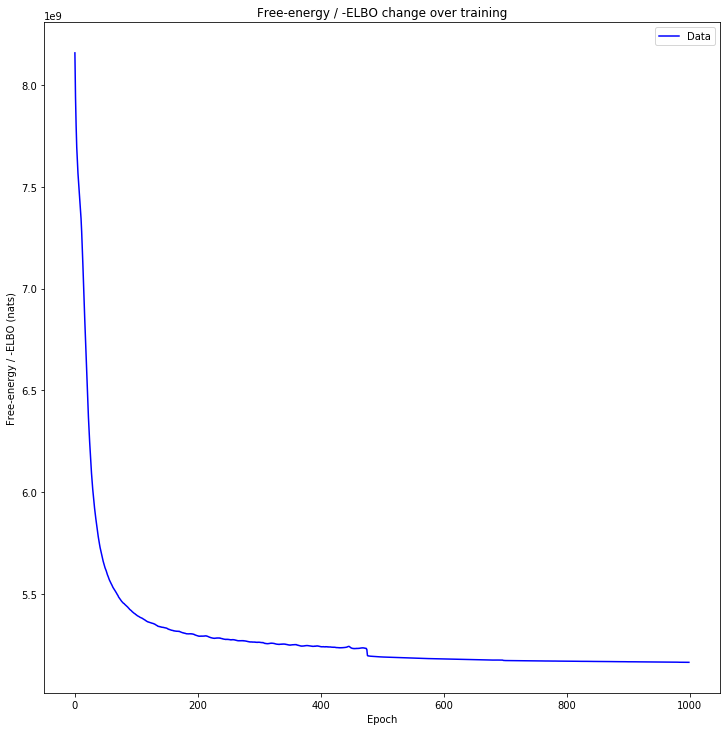

In [11]:
utils.plot_losses(losses)

In [12]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=False))

10/04/2020 14:50:24 [Epoch 1] (683ms) Posterior free-energy 1.23919270e+09 = KL from prior 9.70582031e+04 - log-likelihood -1.23909568e+09
10/04/2020 14:50:24 Saving checkpoint...
10/04/2020 14:50:24 [Epoch 2] (696ms) Posterior free-energy 1.22261018e+09 = KL from prior 9.53223438e+04 - log-likelihood -1.22251494e+09
10/04/2020 14:50:25 [Epoch 3] (691ms) Posterior free-energy 1.19815795e+09 = KL from prior 9.03573906e+04 - log-likelihood -1.19806758e+09
10/04/2020 14:50:26 [Epoch 4] (688ms) Posterior free-energy 1.16974336e+09 = KL from prior 8.88288984e+04 - log-likelihood -1.16965440e+09
10/04/2020 14:50:27 [Epoch 5] (687ms) Posterior free-energy 1.14682650e+09 = KL from prior 8.71244844e+04 - log-likelihood -1.14673933e+09
10/04/2020 14:50:27 [Epoch 6] (688ms) Posterior free-energy 1.13313638e+09 = KL from prior 8.59950625e+04 - log-likelihood -1.13305024e+09
10/04/2020 14:50:28 [Epoch 7] (684ms) Posterior free-energy 1.11842957e+09 = KL from prior 8.53656250e+04 - log-likelihood -1

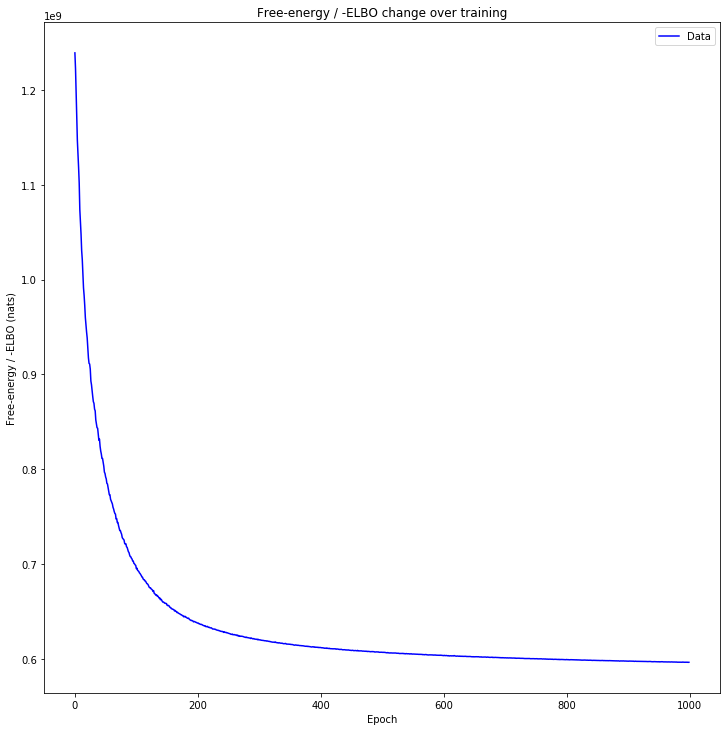

In [13]:
utils.plot_losses(losses)

In [14]:
def task_labeler(task):
    return task

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

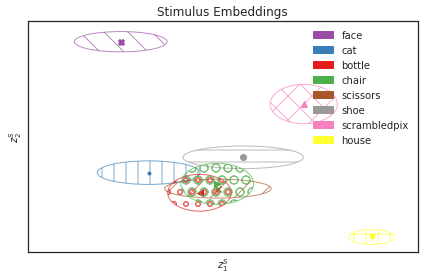

In [15]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='haxby_norest_task_embedding.pdf')

In [16]:
def subject_labeler(subject):
    return 'Subject %d' % subject

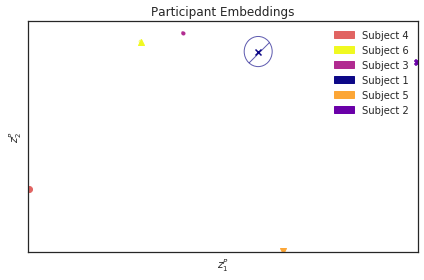

In [17]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [18]:
def block_task_labeler(b):
    task = b.task
    return task

10/04/2020 15:02:01 Plotting factors for Participant 2, run 3


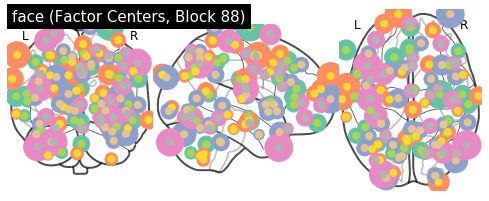

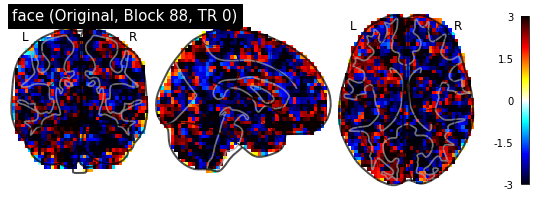

10/04/2020 15:02:04 Reconstruction Error (Frobenius Norm): 1.50327530e+02 out of 6.69425842e+02


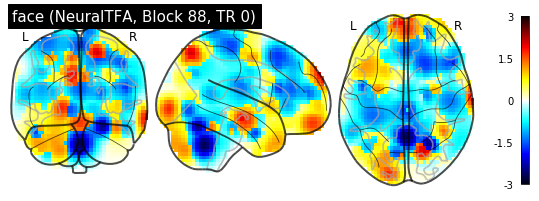

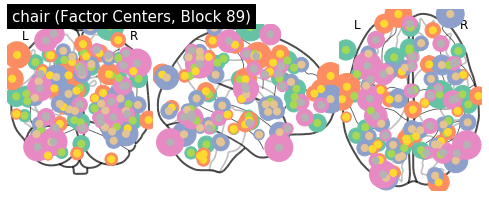

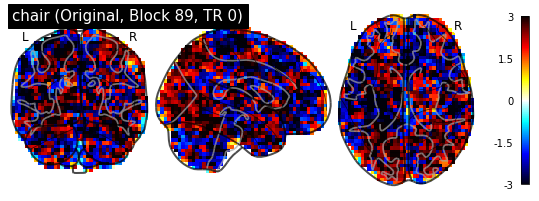

10/04/2020 15:02:07 Reconstruction Error (Frobenius Norm): 1.37427170e+02 out of 6.74605530e+02


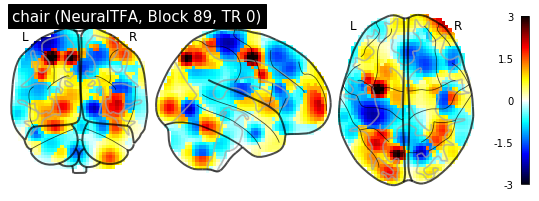

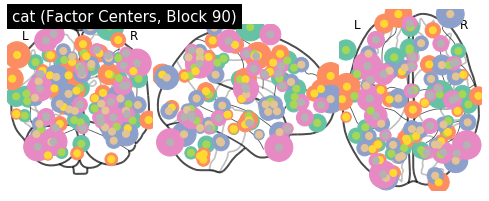

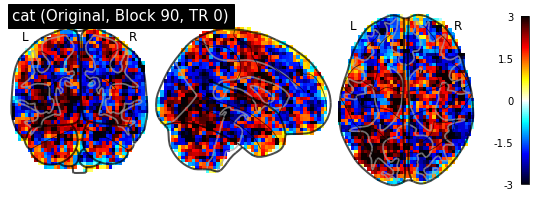

10/04/2020 15:02:10 Reconstruction Error (Frobenius Norm): 1.59928207e+02 out of 6.98438171e+02


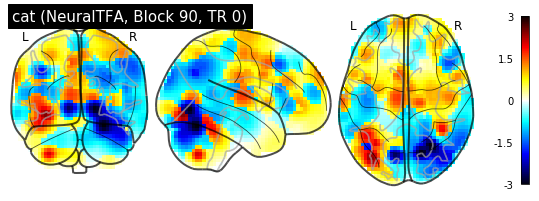

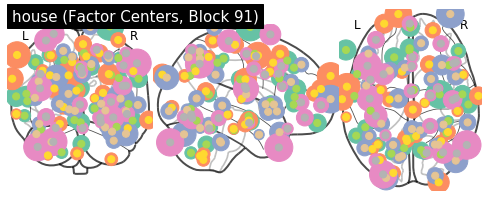

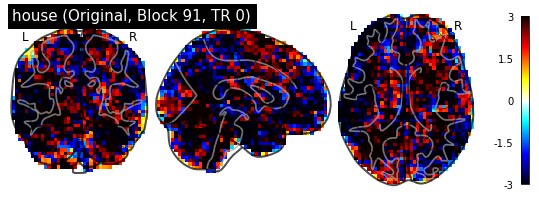

10/04/2020 15:02:13 Reconstruction Error (Frobenius Norm): 1.61386780e+02 out of 7.28632324e+02


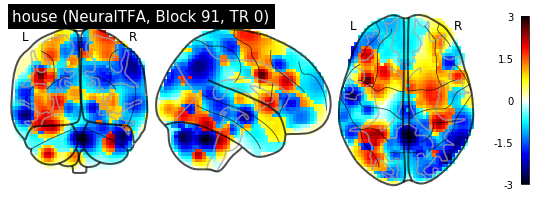

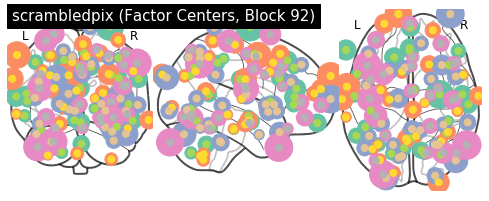

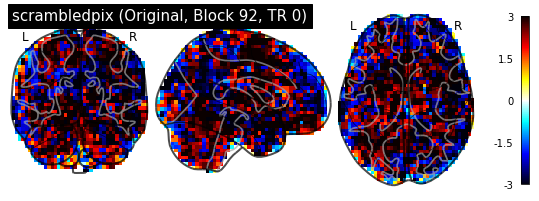

10/04/2020 15:02:16 Reconstruction Error (Frobenius Norm): 1.40518387e+02 out of 6.72555176e+02


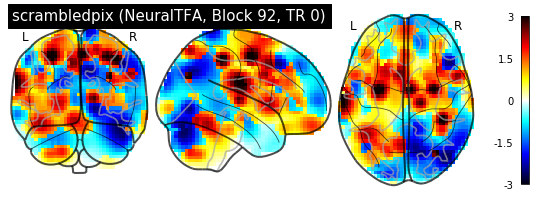

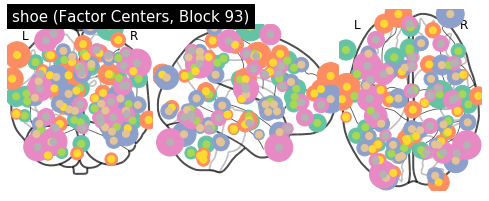

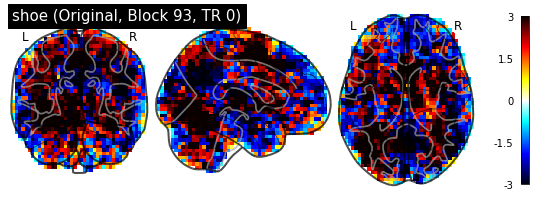

10/04/2020 15:02:18 Reconstruction Error (Frobenius Norm): 1.77914597e+02 out of 7.96064758e+02


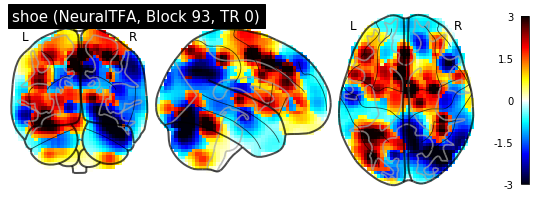

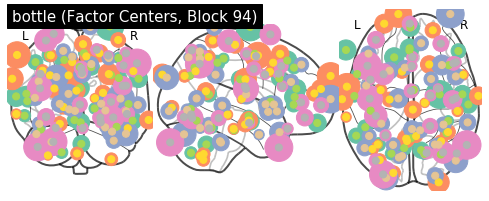

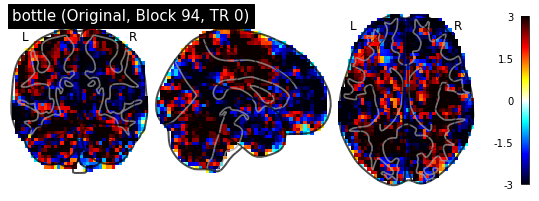

10/04/2020 15:02:21 Reconstruction Error (Frobenius Norm): 1.60368637e+02 out of 7.91174011e+02


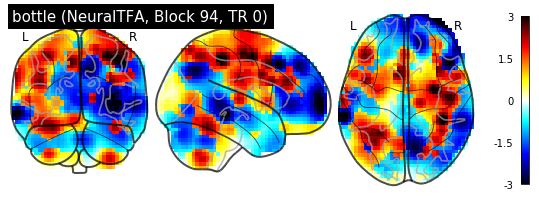

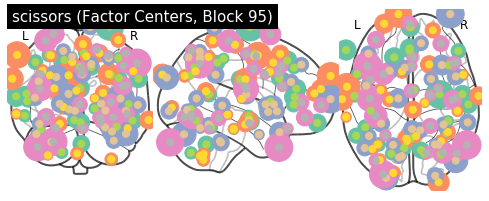

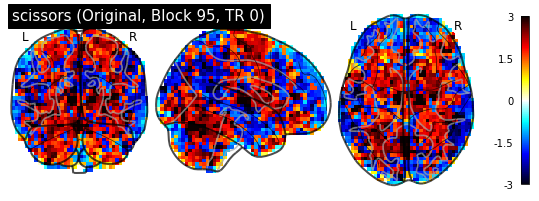

10/04/2020 15:02:24 Reconstruction Error (Frobenius Norm): 1.09835434e+02 out of 6.30872864e+02


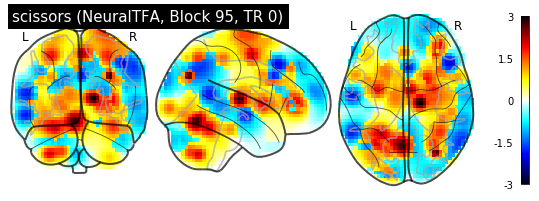

In [19]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

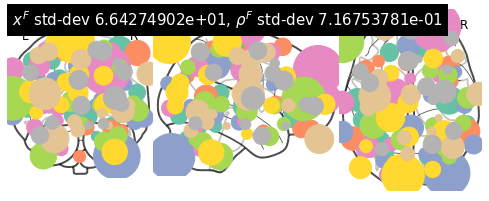

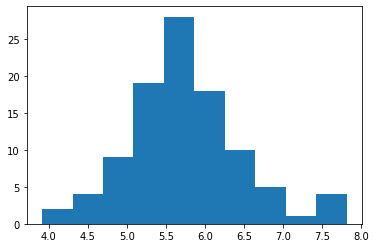

(<nilearn.plotting.displays.OrthoProjector at 0x7f6aa2a371d0>,
 tensor([[-3.1131e+01, -4.6772e+01, -2.1026e+01],
         [ 4.1204e+01, -1.6296e+01,  5.8086e+01],
         [ 3.3097e+01, -6.5471e+01, -2.1909e+01],
         [-2.9605e+01, -5.8738e+01,  4.6802e+01],
         [-2.1767e+01,  3.3828e+01,  2.7932e+01],
         [ 4.1461e+00,  3.9169e+01, -1.0210e+01],
         [-7.9498e+00, -8.5285e+01, -1.0097e+01],
         [ 1.6674e+01, -7.5988e+01,  3.4574e+01],
         [-5.0331e+01, -3.7119e+01,  4.6959e+01],
         [ 5.9938e+01, -4.1483e+01,  1.3697e+01],
         [-5.5469e+01, -1.6060e+01, -2.1473e-01],
         [ 1.6960e+01, -7.8702e+01, -3.2371e+01],
         [-2.7232e+01, -7.2477e+01, -4.2080e+01],
         [ 3.2862e+01,  4.3496e+01, -2.4383e+01],
         [-1.6317e+01, -6.7390e+00,  5.7795e+01],
         [-3.0571e+00,  2.3853e+01,  6.2420e+01],
         [ 3.2052e+01, -7.6634e+01,  3.1613e+01],
         [ 4.1391e+01,  1.9216e+01,  2.9164e+01],
         [-5.6299e-01, -5.6421e+01, -

In [20]:
dtfa.visualize_factor_embedding()

In [21]:
dtfa.average_reconstruction_error(weighted=False,
                                  blocks_filter=haxby_db.inference_filter(training=True))

10/04/2020 15:02:34 Average reconstruction error (MSE): 5.27042290e+02 +/- 4.78015409e+01
10/04/2020 15:02:34 Average data norm (Euclidean): 6.04022353e+02 +/- 6.29924354e+01
10/04/2020 15:02:34 Percent average reconstruction error: 87.448312 +/- 3.66252314e+00


(array([557.63739014, 531.58496094, 497.78872681, 503.92431641,
        524.34899902, 507.27386475, 509.85501099, 485.68185425,
        553.84552002, 526.67346191, 498.57141113, 449.22702026,
        469.84823608, 486.80435181, 546.33575439, 538.33996582,
        499.19210815, 495.27377319, 469.76846313, 498.69482422,
        476.96502686, 532.50408936, 499.18762207, 509.14926147,
        614.27056885, 546.77862549, 505.50509644, 530.70196533,
        475.84396362, 512.48168945, 513.19342041, 476.44195557,
        582.70233154, 522.26574707, 466.15179443, 492.18743896,
        528.66833496, 488.98010254, 504.01992798, 538.7019043 ,
        522.07019043, 535.52276611, 484.35842896, 455.06448364,
        506.1496582 , 552.34521484, 516.93939209, 547.45819092,
        453.84481812, 449.40802002, 467.56698608, 447.49526978,
        464.61584473, 464.89956665, 430.38803101, 494.57751465,
        503.89358521, 459.96099854, 410.69711304, 437.89706421,
        459.21273804, 452.52734375, 462.

In [22]:
dtfa.free_energy(batch_size=50, use_cuda=True, blocks_batch_size=10, num_particles=1, sample_size=100,
                 blocks_filter=haxby_db.inference_filter(training=False))

[[596259072.0, -596111104.0, 147965.5], [596403968.0, -595978944.0, 148472.5]]